### Classification
- *binary classification*: classifies data into two classes 
- *multinomial classification*: classifies data into three or more classes

- *hard assignments*: data classified in one of the categories or classes
- *soft assignments*: data classified using the probability that each category/class applies to the data
    - ie, use a probability value to classify data
    
#### Logistic Regression 
- *logistic regression*: estimates **probability** of event occuring
    - dependent variable between 0 and 1, w/ 1 being the highest likely probability
- odds =/= probability
    - odds can go to infinity; need odds to calculate probability
    - probability stops at 1
    - odds = P / 1 - P = e^(ax+b) -> also log function
        - P is the probability
    - P = 1 / 1 + e^-(b= + b1(x))
- linear regression equation: y = b0 + b1(x)

#### Logistic Regression Rules
- *dependent variable must be binary* for logistic regression
- independent variables are independent of *each other*; model should have no multicollinearity
    - linearly related to log odds
- **logistic regression requires large sample sizes**

### Practice Code

In [7]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# read dataset
df = pd.read_csv('data.csv', na_values='?')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [9]:
#define target variable - rename it
df = df.rename(columns={'num       ': 'target'})
df['target'].value_counts(dropna=False)

#identify if there are null values to drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [10]:
# clean the data - remove rows w/ null values
df = df.drop(['slope', 'ca', 'thal'], axis=1)
df = df.dropna().copy()
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


#### Exploratory Data Analysis & Feature Selection

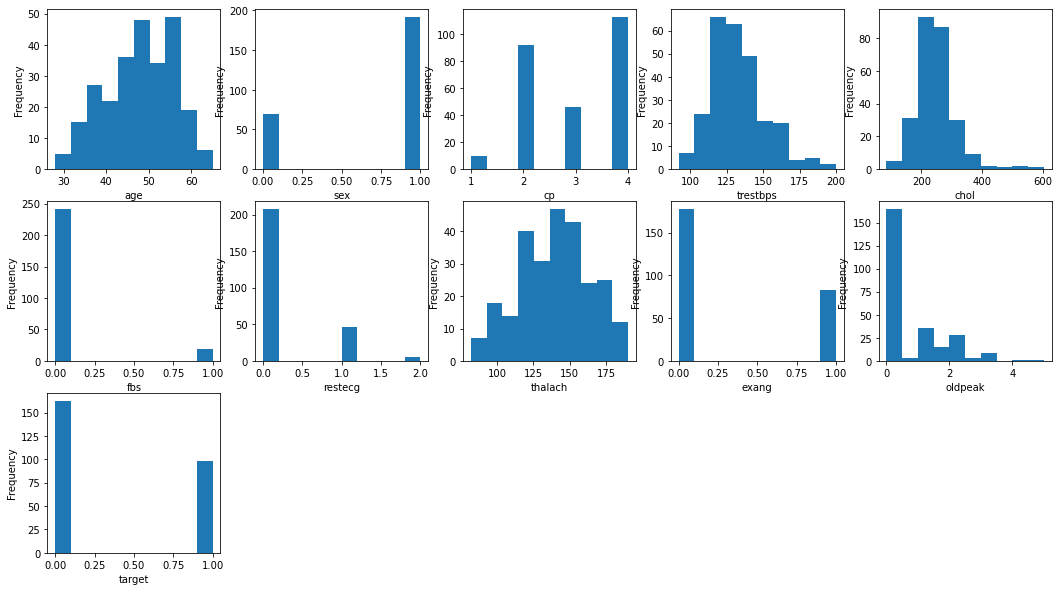

In [11]:
# histogram for all variables
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 10))
i=0

# loop through each category/column in the dataframe and make histogram for each
for column in df:
    sub=fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

#### Numerical Features v Target - Box Plot

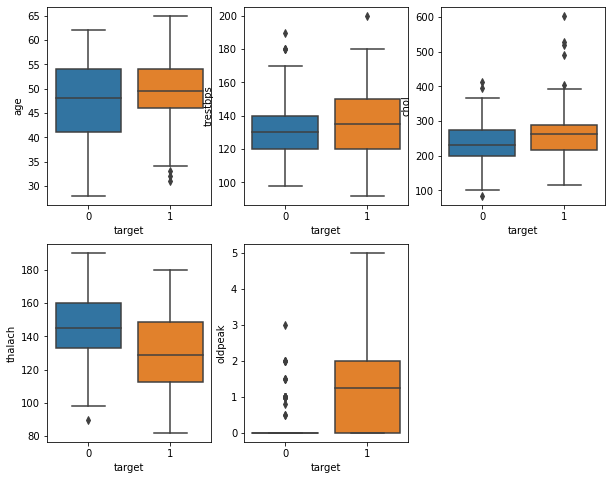

In [12]:
import seaborn as sns
# gather categories w/ numerical data
num_list=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig=plt.figure(figsize=(10, 8))

# loop through these categories and make a boxplot for each
for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,3,i+1)
    sns.boxplot(x='target',y=column, data=df)

# identify which features have significant differences btwn two groups of target variables
# look at their variances -> diff. in mean data btwn the two groups
# variance = F-score; larger = bigger diff btwn groups; found using ANOVA Test
# variance btwn the two groups smaller = larger overall variance F-score

#### ANOVA Test for F-Score (Variance)

In [13]:
# import the test
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# select the numerical features and their categories 
x = df.loc[:, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, 'target']

# k = which features to choose
fs = SelectKBest(score_func=f_classif, k='all')  # call the method
bestFeatures = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)

print("F-Score:")
print(bestFeatures.scores_)    # print out the scores 
print("P-Values:")
print(bestFeatures.pvalues_)

F-Score:
[  6.82632116   5.8238516   12.91406861  35.0095821  121.87191614]
P-Values:
[0.00950736 0.01650507 0.00039027 0.00000001 0.        ]


- Features 2, 3, 4 are more relevant to the target variable (trestbps, chol, thalach)
- If p-value < 0.05, there is statistically significant difference btwn the groups (comparing features
to each other)

#### Categorical Features v Target - Grouped Bar Chart or Stacked Bar Chart

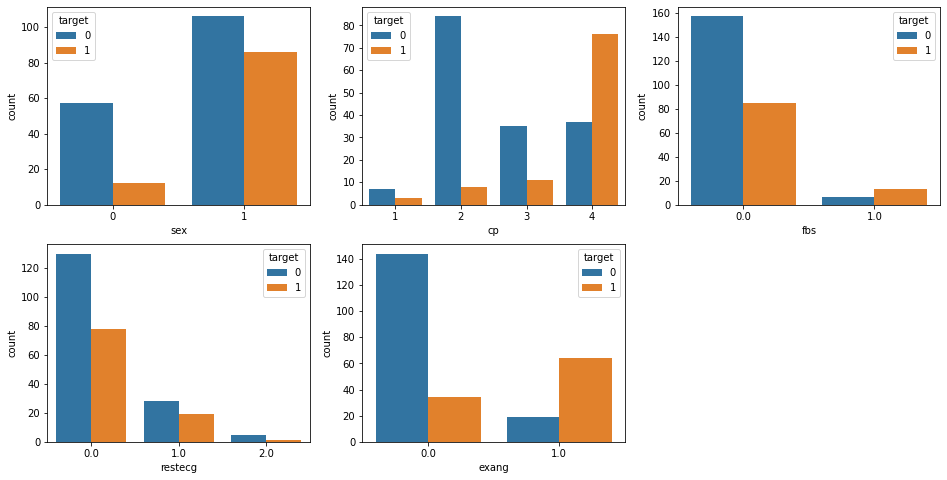

In [14]:
# select the features
cat_list=['sex','cp', 'fbs', 'restecg','exang']

fig=plt.figure(figsize=(16,8))

# increment over each feature
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,3,i+1)
    chart=sns.countplot(x=column, hue='target', data=df)
# 0 = females, 1 = males
# assess feature's affect on the target for each feature graph -> shows w/ feature has significant affect on target
# in the first graph, do males and females have same probability of getting heart attack?
# for feature of cp, which group is more likely to have heart attack?